#### Test sentence-transformers with Wikipedia Big Data classification approach 

In [1]:
import wikipedia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

##### Get Wiki Big Data Summary and embed

In [2]:
print(wikipedia.search("big data"))

['Big data', 'Big Data (band)', 'Data', 'Data science', 'Big data ethics', 'List of big data companies', 'Data lake', 'Data mining', 'Streaming data', 'Data analysis']


In [3]:
big_data_wiki_text = wikipedia.summary("Big data")  # downloaded on Nov 15-17
print(big_data_wiki_text[0:100])

Though used sometimes loosely partly because of a lack of formal definition, the interpretation that


In [4]:
#model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('all-MiniLM-L6-v2')

In [5]:
wiki_embed = model.encode(big_data_wiki_text)
print(wiki_embed.shape)

(384,)


##### Read in Federal RePORTER abstracts and embed

In [7]:
# pull in data
df = pd.read_pickle("../../../../data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")
df.reset_index(inplace = True, drop = True)

print(df.shape)

(1143869, 30)


In [8]:
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,...,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,...,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,...,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,...,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,...,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...


##### first test - can skip to reading in saved embeddings

In [58]:
# as a test, we will embed the first 5000 raw abstracts

abstract_embeddings = model.encode(df['ABSTRACT'][0:5000])
print(abstract_embeddings.shape)

(5000, 384)


In [15]:
abstract_embeddings

array([[ 1.20384119e-01,  8.16156063e-03,  9.28894617e-03, ...,
         5.32603897e-02, -3.88779342e-02,  3.57533023e-02],
       [-5.72349830e-03, -2.37571988e-02,  3.68777220e-03, ...,
        -3.38120833e-02, -8.12887624e-02,  9.24430788e-02],
       [ 3.62169333e-02,  5.91664873e-02,  3.15182880e-02, ...,
         1.69784054e-01, -6.89427108e-02,  5.73992133e-02],
       ...,
       [-1.75447818e-02, -7.06315786e-02,  3.27346213e-02, ...,
        -5.89017719e-02, -3.39082219e-02, -1.95147435e-03],
       [ 2.43563466e-02, -9.93201435e-02,  3.24729793e-02, ...,
         1.23873286e-01, -1.32197383e-04, -3.90445478e-02],
       [-9.14216191e-02, -8.69413391e-02,  1.05147087e-03, ...,
         1.30271874e-02, -6.99800104e-02, -6.25943989e-02]], dtype=float32)

##### Read in computed BERT embeddings

In [10]:
# load BERT embeddings
vector = pd.read_csv('../../../../data/prd/Doc2Vec/bert_final.csv')    

In [11]:
vector.shape

(1143869, 384)

##### Calculate similarity between Big Data Wiki summary and abstracts

In [12]:
scores = cosine_similarity(
    [wiki_embed],
    vector
)
#print(scores)

In [13]:
type(scores)

numpy.ndarray

In [14]:
scores.max()

0.7114261750430765

In [15]:
np.argmax(scores)

471976

In [16]:
df['ABSTRACT'][471976]

'Big Data analytics requires bridging the gap between data-intensive computing and data-driven computing to obtain actionable insights. The former has primarily focused on optimizing data movement, reuse, organization and storage, while the latter has focused on hypothesis-driven, bottom-up data-to-discovery and the two fields have evolved somewhat independently. This exploratory project aims to investigate a holistic Ecosystem that optimizes data generation from simulations, sensors, or business processes (Transaction Step); organizes this data (possibly combining with other data) to enable reduction, pre-processing for downstream data analysis (Organization Step); performs knowledge discovery, learning and mining models from this data (Prediction Step); and leads to actions (e.g., refining models, new experiments, recommendation) (Feedback Step). Intellectual Merit: As opposed to the current practice of considering optimizations in each step in isolation, the project considers scalab

In [17]:
scores.min()

-0.1788268346582267

In [18]:
np.argmin(scores)

622052

In [19]:
df['ABSTRACT'][622052]

'TECHNICAL SUMMARY:Novel ferroelectric behaviors, namely, narrow single and double polarization loops, have been observed in semicrystalline polar polymers and are promising for advanced electrical applications. Based on recent finding from poly(vinylidene fluoride)-based random copolymers, it is proposed that repeating-unit isomorphism having bulky comonomers inside ferroelectric crystals is an effective strategy to expand interchain distance and pin nanosized ferroelectric domains (i.e., nanodomains). In this proposal, the hypothesis of pinned nanodomains via crystal isomorphism is employed to rationally design new ferroelectric nylon copolymers and testify the working mechanism. First, nylon 11 random copolymers with various n-nylon comonomers will be synthesized to mismatch amide groups in the crystal, disrupting hydrogen-bonding interactions for enhanced ferroelectricity. Second, N- or C-methylation will be further employed in nylon 11 random copolymers to expand the interchain di

In [18]:
scores.shape

(1, 1143869)

In [19]:
scores[0].shape

(1143869,)

In [20]:
scores[0][0:10]

array([ 0.1158897 ,  0.11239832,  0.07516901,  0.00435888, -0.00693279,
        0.10332922,  0.12685726,  0.08216588,  0.08385753,  0.20399945])

Text(0, 0.5, 'Frequency')

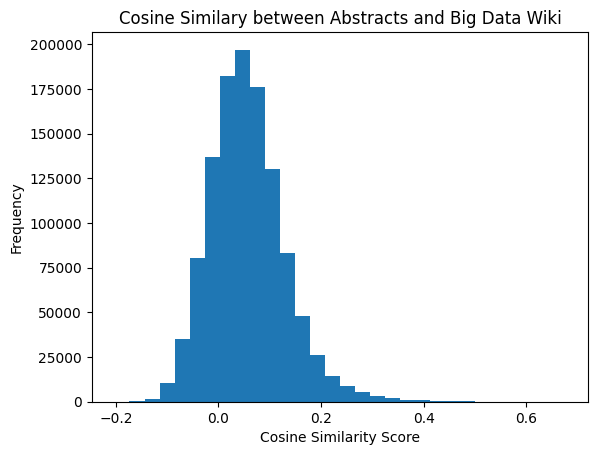

In [21]:
plt.hist(scores[0], bins=30)
plt.title('Cosine Similary between Abstracts and Big Data Wiki')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
#plt.savefig('wiki_sim.png')

In [22]:
scores_df = pd.DataFrame(scores[0])
scores_df.describe()

,0
count,1.143869e+06
mean,5.597372e-02
std,7.344299e-02
min,-2.028002e-01
25%,6.107218e-03
50%,5.014612e-02
75%,9.761767e-02
max,6.762191e-01


In [23]:
np.percentile(scores[0], 99.9)

0.4085942889627746

In [24]:
df['wiki_scores'] = scores[0]

In [25]:
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,wiki_scores
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,...,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0.115890
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,...,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,0.112398
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,...,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,0.075169
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,...,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,0.004359
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,...,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,-0.006933


In [26]:
df["big_data_cnt"] = 0

In [27]:
df.shape

(1143869, 32)

In [28]:
for idx, abstract in enumerate(df['ABSTRACT']):
    abstract_lowercase = abstract.lower()
    if "big data" in abstract_lowercase or "big-data" in abstract_lowercase:
        df.iloc[idx, 31] = abstract_lowercase.count("big data") + abstract_lowercase.count("big-data")

In [29]:
sum(df["big_data_cnt"])

8503

In [30]:
sum(df["big_data_cnt"] != 0)

4628

In [31]:
temp = df[df['wiki_scores'] > 0.4]

In [32]:
len(temp)

1278

In [33]:
temp["wiki_scores"].iloc[3]

0.4096705172255217

In [34]:
temp["ABSTRACT"].iloc[3]

'This project seeks to develop incremental processing abstractions andtechnologies to address the approaching bottleneck in processingunstructured web-scale data.  Government, medical, financial, and web-basedservices increasingly depend on the ability to rapidly sift through huge,evolving data sets.  These data-intensive applications perform complexmulti-step computations over successive generations of data inflows (e.g.,weekly web crawls or nightly telescope dumps).  Current approaches toprocessing unstructured data have driven the development of massivelyparallel  ad-hoc  data processing systems, such as MapReduce.  However,they process data in a snap-shot fashion, forcing massive re-computationswhen even a small amount of new data arrives.The core of the project consists of a cluster-based incremental dataprocessing system that overcomes these limitations.  A key component is adataflow programming model that combines massive parallelism and flexible,incremental computations.  An in

##### how does the Wiki comparison method compare with term matching?

In [35]:
temp.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,wiki_scores,big_data_cnt
373,90145,Scientists and supporters of science have long...,Address; American Indians; Biological Models; ...,"COLLABORATIVE RESEARCH: AOC: MONITORING, MODEL...",NSF,NSF,NaN,0827333,10/1/2008,9/30/2011,...,2008,193905.0,NaN,3,3,1220851.0,3,scientist supporter science long work improve ...,0.437631,0
672,90761,ENABLING MASSIVE SCIENTIFIC DATABASES THROUGH ...,Data Set; Databases; design; simulation,''ENABLING MASSIVE SCIENTIFIC DATABASES THROUG...,NASA,NASA,NaN,NNX08AY72G,8/1/2008,1/21/2011,...,2008,159359.0,NaN,1,1,159359.0,1,enable massive scientific database automated s...,0.430477,0
1681,91610,Intellectual Merit: This project implements P...,Archives; Climate; Communities; Data; Data Ana...,"SEDDB, THE ONLINE INFORMATION SYSTEM FOR SEDIM...",NSF,NSF,NaN,0826197,9/1/2008,8/31/2011,...,2008,399123.0,NaN,1,1,399123.0,1,intellectual_merit project implement phase ii ...,0.419146,0
2651,92672,This project seeks to develop incremental proc...,Address; base; Communities; Complex; computeri...,"CSR-DMSS, SM: INCREMENTAL WEB-SCALE DATA PROCE...",NSF,NSF,NaN,0834784,9/1/2008,8/31/2009,...,2008,100000.0,NaN,1,1,100000.0,1,project seek develop incremental processing ab...,0.409671,0
3987,94151,Commercial and government entities now spend a...,Algorithms; Archives; Benchmarking; Computer s...,III-COR-MEDIUM: DESIGN AND IMPLEMENTATION OF T...,NSF,NSF,NaN,0803511,8/1/2008,8/31/2010,...,2008,177401.0,NaN,1,1,177401.0,1,commercial government entity spend billion per...,0.423867,0


In [36]:
sum(temp['big_data_cnt'] != 0)

867

In [37]:
100*sum(temp['big_data_cnt'] != 0)/len(temp)

67.84037558685446

In [38]:
# add to training set...the 1278-867 = 411 abstracts from temp without "big data"

add_train_df = temp[temp['big_data_cnt'] == 0] 

In [39]:
len(add_train_df)

411

In [40]:
add_train_df["ABSTRACT"].iloc[100]

'The Innovations in Data-Intensive Astronomy workshop, to be held in Green Bank, WV, will be a cross disciplinary meeting to bring together computer science experts in data intensive computing and infrastructure, and leading astronomy researchers motivated by the need to analyze and curate massive astronomical data sets. The workshop will focus on discussions devoted to the development and deployment of next generation data intensive software applications and infrastructure to satisfy the science goals of the 2010 Astronomy and Astrophysics Decadal Survey. This workshop will facilitate discussion and foster the establishment of collaborations for data intensive scientific computing across a number of disciplines, including all branches of astronomy as well as computer science.  The workshop is timely with regard to the topic of data curation. There is much discussion and debate surrounding the decision of what data to archive long term. Complimentarily, the idea of software as an instr

In [41]:
# save PROJECT IDS of training addition

add_train_ids = add_train_df["PROJECT_ID"]

In [42]:
type(add_train_ids)

pandas.core.series.Series

In [43]:
add_train_ids.to_csv("training_addition_ids.csv", index=False)

In [44]:
add_train_df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,wiki_scores,big_data_cnt
373,90145,Scientists and supporters of science have long...,Address; American Indians; Biological Models; ...,"COLLABORATIVE RESEARCH: AOC: MONITORING, MODEL...",NSF,NSF,NaN,0827333,10/1/2008,9/30/2011,...,2008,193905.0,NaN,3,3,1220851.0,3,scientist supporter science long work improve ...,0.437631,0
672,90761,ENABLING MASSIVE SCIENTIFIC DATABASES THROUGH ...,Data Set; Databases; design; simulation,''ENABLING MASSIVE SCIENTIFIC DATABASES THROUG...,NASA,NASA,NaN,NNX08AY72G,8/1/2008,1/21/2011,...,2008,159359.0,NaN,1,1,159359.0,1,enable massive scientific database automated s...,0.430477,0
1681,91610,Intellectual Merit: This project implements P...,Archives; Climate; Communities; Data; Data Ana...,"SEDDB, THE ONLINE INFORMATION SYSTEM FOR SEDIM...",NSF,NSF,NaN,0826197,9/1/2008,8/31/2011,...,2008,399123.0,NaN,1,1,399123.0,1,intellectual_merit project implement phase ii ...,0.419146,0
2651,92672,This project seeks to develop incremental proc...,Address; base; Communities; Complex; computeri...,"CSR-DMSS, SM: INCREMENTAL WEB-SCALE DATA PROCE...",NSF,NSF,NaN,0834784,9/1/2008,8/31/2009,...,2008,100000.0,NaN,1,1,100000.0,1,project seek develop incremental processing ab...,0.409671,0
3987,94151,Commercial and government entities now spend a...,Algorithms; Archives; Benchmarking; Computer s...,III-COR-MEDIUM: DESIGN AND IMPLEMENTATION OF T...,NSF,NSF,NaN,0803511,8/1/2008,8/31/2010,...,2008,177401.0,NaN,1,1,177401.0,1,commercial government entity spend billion per...,0.423867,0


##### What if we removed the phrase "big data" from abstracts...do they still score as high?

Need to do this with removing "big-data" as well

In [51]:
big_data_term_df = df[df['big_data_cnt'] > 0]

In [52]:
len(big_data_term_df)

4383

In [53]:
# remove 'big data' instances in each abstract

big_data_term_df['working_abstract'] = ""

/home/kjl5t/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [54]:
big_data_term_df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,wiki_scores,big_data_cnt,working_abstract
105027,114036,The Virtualization Studio spearheads research ...,Algorithms; Arts; Behavior; Biological Preserv...,II-EN THE HUMAN VIRTUALIZATION STUDIO: FROM DI...,NSF,NSF,NaN,0855163,7/15/2009,6/30/2011,...,600000.0,NaN,1,1,600000.0,1,virtualization studio spearhead research recon...,0.121756,1,
110140,119449,Progress in the field of machine translation (...,Algorithms; Architecture; Area; cluster comput...,INCA: AN INTEGRATED CLUSTER COMPUTING ARCHITEC...,NSF,NSF,NaN,0844507,2/15/2009,1/31/2012,...,465089.0,NaN,1,1,465089.0,1,progress field machine translation mt come dep...,0.338492,1,
153476,275113,DESCRIPTION (provided by applicant): Rare dise...,abstracting; Acquired Immunodeficiency Syndrom...,INTEGRATED DISCOVERY AND HYPOTHESIS TESTING OF...,HHS,NIH,NLM,1R01LM010140-01,7/1/2009,6/30/2011,...,533007.0,NaN,1,1,533007.0,1,rare disease study isolated laboratory forget ...,0.285717,1,
157841,280840,DESCRIPTION (provided by applicant): Recent ad...,Achievement; Address; Adopted; Algorithms; ant...,SEMANTIC DATA INTEGRATION FOR INTEGRATIVE CANC...,HHS,NIH,NCI,2R44CA132293-02A2,9/21/2007,8/31/2012,...,449882.0,NaN,1,1,449882.0,1,recent advance high throughput measurement cri...,0.321332,1,
257284,350954,DESCRIPTION (provided by applicant): Recent ad...,Achievement; Address; Adopted; Algorithms; ant...,SEMANTIC DATA INTEGRATION FOR INTEGRATIVE CANC...,HHS,NIH,NCI,5R44CA132293-03,9/21/2007,8/31/2012,...,463379.0,NaN,1,1,463379.0,1,recent advance high throughput measurement cri...,0.321332,1,


In [55]:
for idx, abstract in enumerate(big_data_term_df['ABSTRACT']):
    temp_abs = abstract.replace('big data', '')
    temp_abs = temp_abs.replace('Big Data', '')
    temp_abs = temp_abs.replace('Big data', '')
    temp_abs = temp_abs.replace('BIG Data', '')
    #temp_abs = temp_abs.replace('BIG data', '') removes 3 caBIG data mentions and 1 legit
    temp_abs = temp_abs.replace('biG data', '')
    big_data_term_df['working_abstract'].iloc[idx] = temp_abs.replace('BIG DATA', '')    

/home/kjl5t/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
big_data_term_df['ABSTRACT'].iloc[0]

'The Virtualization Studio spearheads research to reconstruct, record, and render dynamic events in 3D. The studio creates a ?full-body? interactive environment where multiple users are simultaneously given a visceral sense of three dimensional space, through vision and sound, and are able to interact, through action and speech, unencumbered by 3D glasses, head-mounted displays or special clothing. The studio pursues the thesis that robust sensors for hard problems, in this case audiovisual reconstruction of highly dynamic multiple actors/speakers, can be constructed by using a large number of sensors running simple, parallelized algorithms. High fidelity reconstructions are created using a grid of 1132 cameras, and a 128-node multi-speaker microphone array to localize and associate multiple sound sources in the event space. In addition, a multi-viewer lenticular display screen, consisting of 48 projectors, and a front surround sound speaker are used to render interactive environments.

In [57]:
big_data_term_df['working_abstract'].iloc[0]

'The Virtualization Studio spearheads research to reconstruct, record, and render dynamic events in 3D. The studio creates a ?full-body? interactive environment where multiple users are simultaneously given a visceral sense of three dimensional space, through vision and sound, and are able to interact, through action and speech, unencumbered by 3D glasses, head-mounted displays or special clothing. The studio pursues the thesis that robust sensors for hard problems, in this case audiovisual reconstruction of highly dynamic multiple actors/speakers, can be constructed by using a large number of sensors running simple, parallelized algorithms. High fidelity reconstructions are created using a grid of 1132 cameras, and a 128-node multi-speaker microphone array to localize and associate multiple sound sources in the event space. In addition, a multi-viewer lenticular display screen, consisting of 48 projectors, and a front surround sound speaker are used to render interactive environments.

In [58]:
for idx, abstract in enumerate(big_data_term_df['working_abstract']):
    if "big data" in abstract.lower():
        #print("\n")
        #print(abstract)
        print(idx)

3
4
10
733


In [59]:
big_data_term_df["working_abstract"].iloc[733]

'Natural fractures act as major heterogeneities in the subsurface that controls flow and transport of subsurface fluids and chemical species. Their importance cannot be underestimated, because their transmissivity may result in undesired migration during geologic sequestration of CO2, they strongly control heat recovery from geothermal reservoirs, and they may lead to induced seismicity due to fluid injection into the subsurface. Advanced computational methods are critical to design subsurface processes in fractured media for successful environmental and energy applications. This project will address the following key BIG data and computer science challenges: (1) Computation of seismic wave propagation in fractured media; (2)  analytics for inferring fracture characteristics; (3) High Performance Computation of flow and transport in fractured media; and (4) Integration of data from disparate sources for risk assessment and decision-making. This will enable design of technologies for ad

In [60]:
# need to reset index for embeddings to work

big_data_term_df.reset_index(inplace = True, drop = True)

In [61]:
# embed abstracts

abs_del_bigdata_embeddings = model.encode(big_data_term_df['working_abstract'])

In [62]:
print(abs_del_bigdata_embeddings.shape)

(4383, 384)


In [63]:
new_scores = cosine_similarity(
    [wiki_embed],
    abs_del_bigdata_embeddings
)
#print(scores)

In [64]:
new_scores.max()

0.57391745

In [65]:
new_scores.min()

-0.04830304

In [66]:
new_scores[0][:3]

array([0.12175605, 0.27203265, 0.22610486], dtype=float32)

Text(0, 0.5, 'Frequency')

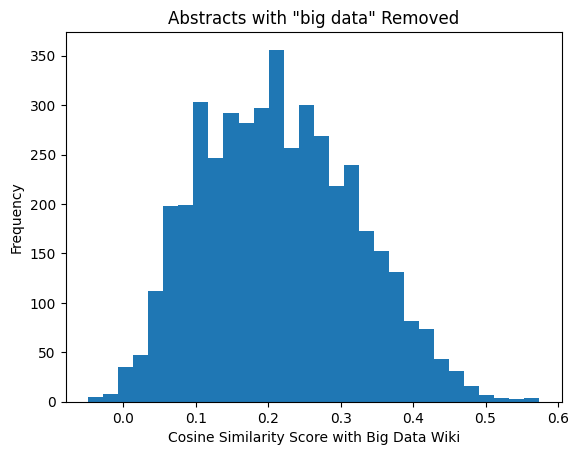

In [67]:
plt.hist(new_scores[0], bins=30)
plt.title('Abstracts with "big data" Removed')
plt.xlabel('Cosine Similarity Score with Big Data Wiki')
plt.ylabel('Frequency')
#plt.savefig('remove_bd_term_wiki_sim.png')

In [68]:
big_data_term_df['wiki_score_wo_bigdata'] = new_scores[0]

/home/kjl5t/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [69]:
big_data_term_df.head(10)

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,wiki_scores,big_data_cnt,working_abstract,wiki_score_wo_bigdata
0,114036,The Virtualization Studio spearheads research ...,Algorithms; Arts; Behavior; Biological Preserv...,II-EN THE HUMAN VIRTUALIZATION STUDIO: FROM DI...,NSF,NSF,NaN,0855163,7/15/2009,6/30/2011,...,NaN,1,1,600000.0,1,virtualization studio spearhead research recon...,0.121756,1,The Virtualization Studio spearheads research ...,0.121756
1,119449,Progress in the field of machine translation (...,Algorithms; Architecture; Area; cluster comput...,INCA: AN INTEGRATED CLUSTER COMPUTING ARCHITEC...,NSF,NSF,NaN,0844507,2/15/2009,1/31/2012,...,NaN,1,1,465089.0,1,progress field machine translation mt come dep...,0.338492,1,Progress in the field of machine translation (...,0.272033
2,275113,DESCRIPTION (provided by applicant): Rare dise...,abstracting; Acquired Immunodeficiency Syndrom...,INTEGRATED DISCOVERY AND HYPOTHESIS TESTING OF...,HHS,NIH,NLM,1R01LM010140-01,7/1/2009,6/30/2011,...,NaN,1,1,533007.0,1,rare disease study isolated laboratory forget ...,0.285717,1,DESCRIPTION (provided by applicant): Rare dise...,0.226105
3,280840,DESCRIPTION (provided by applicant): Recent ad...,Achievement; Address; Adopted; Algorithms; ant...,SEMANTIC DATA INTEGRATION FOR INTEGRATIVE CANC...,HHS,NIH,NCI,2R44CA132293-02A2,9/21/2007,8/31/2012,...,NaN,1,1,449882.0,1,recent advance high throughput measurement cri...,0.321332,1,DESCRIPTION (provided by applicant): Recent ad...,0.321333
4,350954,DESCRIPTION (provided by applicant): Recent ad...,Achievement; Address; Adopted; Algorithms; ant...,SEMANTIC DATA INTEGRATION FOR INTEGRATIVE CANC...,HHS,NIH,NCI,5R44CA132293-03,9/21/2007,8/31/2012,...,NaN,1,1,463379.0,1,recent advance high throughput measurement cri...,0.321332,1,DESCRIPTION (provided by applicant): Recent ad...,0.321333
5,425413,DESCRIPTION (provided by applicant): Rare dise...,Affect; blind; Case Study; Curiosities; Data S...,INTEGRATED DISCOVERY AND HYPOTHESIS TESTING OF...,HHS,NIH,NLM,3R01LM010140-02S1,7/1/2009,6/30/2011,...,NaN,1,1,541496.0,2,rare disease study isolated laboratory forget ...,0.285717,1,DESCRIPTION (provided by applicant): Rare dise...,0.226105
6,138258,Contemporary information technology is ever mo...,Collaborations; Collection; college; Communica...,EAGER: AN EXPLORATION IN ENABLING COMMUNITY-DR...,NSF,NSF,NaN,1153617,9/1/2011,8/31/2013,...,NaN,1,1,120114.0,1,contemporary information technology central sc...,0.496617,1,Contemporary information technology is ever mo...,0.356064
7,139207,North Carolina State University proposes the E...,Advocacy; base; computer science; County; Data...,TYPE I: ENGAGE: IMMERSIVE GAME-BASED LEARNING ...,NSF,NSF,NaN,1138497,1/1/2012,12/31/2014,...,NaN,1,1,999996.0,1,north_carolina state university propose engage...,0.141772,1,North Carolina State University proposes the E...,0.116528
8,140038,All-pairs similarity comparison is one of the ...,Advertisements; Algorithms; Businesses; Commun...,III: SMALL: PARALLEL SIMILARITY COMPARISON AND...,NSF,NSF,NaN,1118106,8/15/2011,7/31/2014,...,NaN,1,1,515732.0,1,pair similarity comparison core algorithm data...,0.245515,1,All-pairs similarity comparison is one of the ...,0.245515
9,143084,The goal of this project is to explore key alg...,Algorithms; base; Cataloging; Catalogs; Cities...,EAGER: EXPLORING AND LINKING WIDELY DISTRIBUTE...,NSF,NSF,NaN,1143585,9/1/2011,8/31/2013,...,NaN,1,1,197407.0,1,goal project explore key algorithm technology ...,0.387680,1,The goal of this project is to explore key alg...,0.387680


(0.195, 0.45)

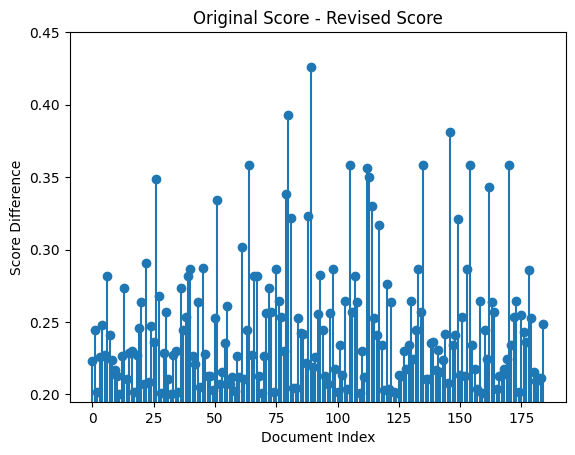

In [70]:
# plot differences in wiki scores

diff = big_data_term_df["wiki_scores"] - big_data_term_df["wiki_score_wo_bigdata"]

plt.stem(diff[diff > 0.2] , )
plt.title('Original Score - Revised Score')
plt.xlabel('Document Index')
plt.ylabel('Score Difference')
plt.ylim(0.195,0.45)
#plt.savefig('remove_bd_term_wiki_sim.png')

Text(0, 0.5, 'Frequency')

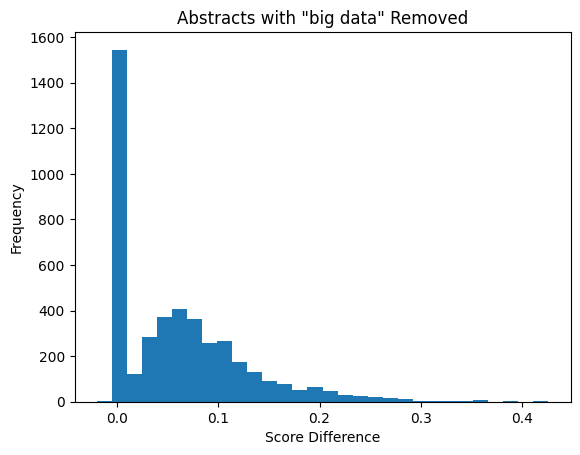

In [71]:
# plot differences in wiki scores

diff = big_data_term_df["wiki_scores"] - big_data_term_df["wiki_score_wo_bigdata"]

plt.hist(diff, bins=30 )
plt.title('Abstracts with "big data" Removed')
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
#plt.savefig('figures/score_diff_hist.png')

In [72]:
diff[:10]

0   -3.865981e-09
1    6.645964e-02
2    5.961170e-02
3   -7.873756e-08
4   -7.873756e-08
5    5.961170e-02
6    1.405531e-01
7    2.524438e-02
8    6.262873e-08
9    2.074205e-08
dtype: float64

In [73]:
diff_df = pd.DataFrame(diff)
diff_df.describe()

,0
count,4.383000e+03
mean,6.038315e-02
std,6.492341e-02
min,-1.980091e-02
25%,3.497211e-08
50%,4.979661e-02
75%,9.638879e-02
max,4.256910e-01


([<matplotlib.axis.XTick at 0x7f90a5f6b940>], [Text(1, 0, '')])

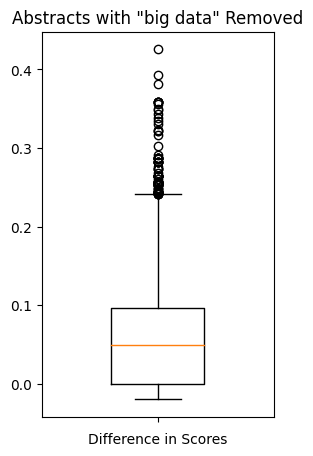

In [74]:
f = plt.figure()
f.set_figwidth(3)
f.set_figheight(5)

plt.boxplot(diff, widths = 0.4)
plt.title('Abstracts with "big data" Removed')
plt.xlabel('Difference in Scores')
plt.xticks([1], [''])
#plt.savefig('figures/score_diff_box.png')

In [75]:
np.min(diff)

-0.019800912866264675

In [76]:
np.argmin(diff)

3584

In [96]:
np.argsort(diff)[-15:]

4368    2124
4369     839
4370    1321
4371    3364
4372     523
4373    2101
4374    2099
4375    1846
4376    2651
4377    3213
4378    1049
4379    3721
4380    2848
4381    1326
4382    1410
dtype: int64

In [78]:
diff.iloc[1403]

-0.005679911573917562

In [79]:
big_data_term_df["ABSTRACT"].iloc[1403]

'Many artificial intelligence (AI) applications such as image understanding and natural language processing rely on Machine Learning (ML) methods to automatically extract valuable knowledge from Big Data (Big Learning). Efficient ML requires not only expertise in advanced mathematical models and algorithms, but also experiences with large computer clusters where issues such as machine failures, memory/network bottlenecks, inter-machine latencies must be properly handled through complex system programming. Such demand on  dual skill  often prevents democratizing large-scale AI to wide user communities, and necessitates a new framework that bridges ML and the distributed computing environment of a cluster with a single-machine-like simple interface, allowing ML practitioners to be agnostic about the backend details, and able to quickly prototype or deploy ML programs on clusters. Solutions to such a need remain rare. In this project the PIs develop a new general purpose framework for ML 

In [80]:
big_data_term_df["working_abstract"].iloc[1403]

'Many artificial intelligence (AI) applications such as image understanding and natural language processing rely on Machine Learning (ML) methods to automatically extract valuable knowledge from  (Big Learning). Efficient ML requires not only expertise in advanced mathematical models and algorithms, but also experiences with large computer clusters where issues such as machine failures, memory/network bottlenecks, inter-machine latencies must be properly handled through complex system programming. Such demand on  dual skill  often prevents democratizing large-scale AI to wide user communities, and necessitates a new framework that bridges ML and the distributed computing environment of a cluster with a single-machine-like simple interface, allowing ML practitioners to be agnostic about the backend details, and able to quickly prototype or deploy ML programs on clusters. Solutions to such a need remain rare. In this project the PIs develop a new general purpose framework for ML on distr

In [111]:
# max diff

diff.iloc[364]

4.38724617746189e-08

In [109]:
big_data_term_df.iloc[3364]

PROJECT_ID                                                              1186559
ABSTRACT                      Objective 1: To perform agriculture Big Data r...
PROJECT_TERMS                 Address; Agriculture; Animals; Big Data; Compu...
PROJECT_TITLE                    EXTENDING COMPUTING INFRASTRUCTURE AND SUPPORT
DEPARTMENT                                                                 USDA
AGENCY                                                                      ARS
IC_CENTER                                                                   ARS
PROJECT_NUMBER                                                 ARS-0435071-PROJ
PROJECT_START_DATE                                                    7/26/2018
PROJECT_END_DATE                                                      7/25/2023
CONTACT_PI_PROJECT_LEADER                                       STEVEN M KAPPES
OTHER_PIS                                                                   NaN
CONGRESSIONAL_DISTRICT                  

In [110]:
big_data_term_df["ABSTRACT"].iloc[3364]

'Objective 1: To perform agriculture Big Data research to address animal health, plant health, food safety and agricultural productivity.   Objective 2: To improve computational analysis of Big Data by developing software suited to an HPC environment.'

In [89]:
big_data_term_df["working_abstract"].iloc[2848]

"The second annual joint Principal Investigators meeting for the  program and the  Hubs and Spokes program provides updates to progress on intellectual objectives and information sharing. The meeting will promote interaction between the participants in these programs, facilitate collaborations, expose students to the latest research, and situate the programs within the larger  ecosystem.The meeting will be a three-day meeting that includes one day dedicated to each program and a third day shared between the two. The agenda includes breakouts, panel discussions, lightning talks, and poster sessions to encourage intellectual engagement across the programs, thus setting conditions for new projects and multi-disciplinary activities. The meeting will produce a report that highlights outcomes for broader dissemination and sharing.This award reflects NSF's statutory mission and has been deemed worthy of support through evaluation using the Foundation's intellectual merit and broader impacts r

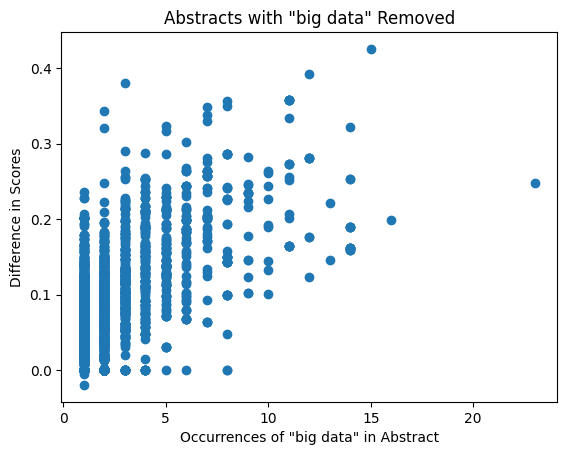

In [86]:
# relationship between score difference and number of occurences of big data

plt.scatter(big_data_term_df["big_data_cnt"], diff)
plt.title('Abstracts with "big data" Removed')
plt.ylabel('Difference in Scores')
plt.xlabel('Occurrences of "big data" in Abstract')
plt.savefig('figures/cnt_vs_diff.png')

In [101]:
np.sort(diff)[-20:]

array([0.30187874, 0.31678033, 0.32102893, 0.32200842, 0.32335016,
       0.32987518, 0.33412708, 0.33830181, 0.34300375, 0.34832905,
       0.34974134, 0.35601936, 0.35862094, 0.35862094, 0.35862094,
       0.35862094, 0.35862094, 0.3811667 , 0.39299208, 0.42569103])